# Car Evaluation Problem With Decision Tree Classifier 

# Problem Statement: 
    
    Using scikit learn implement decision tree (https://archive.ics.uci.edu/ml/datasets/Car+Evaluation.
    Use python packages for the visualization of the decision tree.
    Fit a decision tree with the default parameters on 50% of the data.
    Test it on 50% held out data and generate a classification report.
    Inspect the model by visualizing and interpreting the results whether it makes sense.

In order to solve this problem - we need following libraries: Pandas, Numpy, Matplotlib, Seaborn, and Sklearn. Importing the libraries one by one in next step: 

In [1]:
## Importing all the libraries. 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import zscore 
from imblearn.over_sampling import SMOTE
import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, power_transform 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
## Loading the dataset now. 
df = pd.read_csv("car.csv")

# Data Description: 

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

    CAR car acceptability
    . PRICE overall price
    . . buying buying price
    . . maint price of the maintenance
    . TECH technical characteristics
    . . COMFORT comfort
    . . . doors number of doors
    . . . persons capacity in terms of persons to carry
    . . . lug_boot the size of luggage boot
    . . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

Source: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation 

# Understanding the Dataset: 

In [3]:
## Checking the columns first that dataset inlcudes. 
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [4]:
df.head(2)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc


## Attributes Information
Class Values: unacc, acc, good, vgood

Attributes:

    Buying: vhigh, high, med, low.
    Maintanince Price: vhigh, high, med, low.
    Doors available: 2, 3, 4, 5more.
    Number of person can sit: 2, 4, more.
    Luggae Boot: small, med, big.
    Safety level: low, med, high.

In [5]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


We have all the variables in an object data type. However, this is a classification problem and we need to implement the Decision Tree Alorithm here - we will encode them for smooth training of the model furter with the process.

We will change the variable name as per the attribute infromation avilable to us. 

In [7]:
df.rename(columns={"vhigh":"Buying Price"},inplace=True)

In [8]:
df.rename(columns={"vhigh.1":"Maintaince Price"},inplace=True)

In [9]:
df.rename(columns={"2":"Doors Available"},inplace=True)

In [10]:
df.rename(columns={"2.1":"Number of persons can sit"},inplace=True)

In [11]:
df.rename(columns={"small":"Luggage Boot"},inplace=True)

In [12]:
df.rename(columns={"low":"Safety Level"},inplace=True)

In [13]:
df.rename(columns={"unacc":"Car Acceptiblity"},inplace=True)

In [14]:
## Checking the final dataset we got here with real attributes names. 
df

,Buying Price,Maintaince Price,Doors Available,Number of persons can sit,Luggage Boot,Safety Level,Car Acceptiblity
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


# Performing univariate and bivariate analysis on the dataset to understand it in more effective way - 

['vhigh' 'high' 'med' 'low']


<AxesSubplot:xlabel='Buying Price', ylabel='count'>

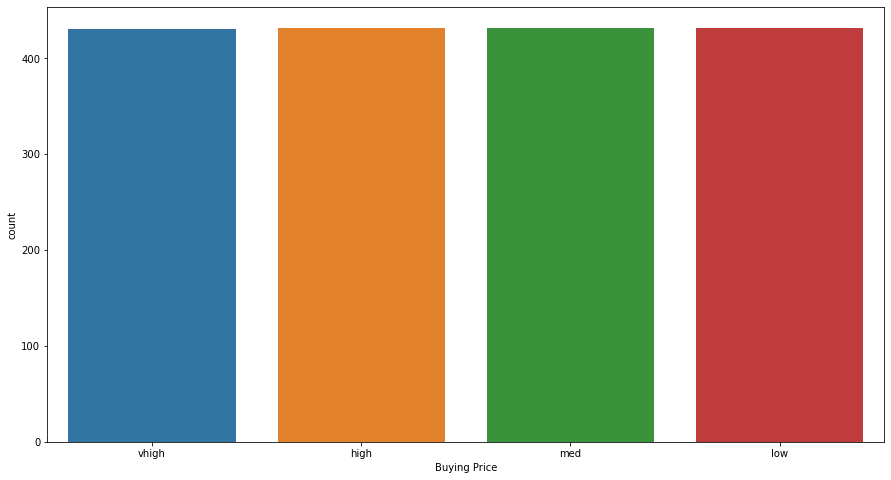

In [15]:
print(df['Buying Price'].unique())
plt.figure(figsize=[15,8])
sns.countplot(df['Buying Price'])

['vhigh' 'high' 'med' 'low']


<AxesSubplot:xlabel='Maintaince Price', ylabel='count'>

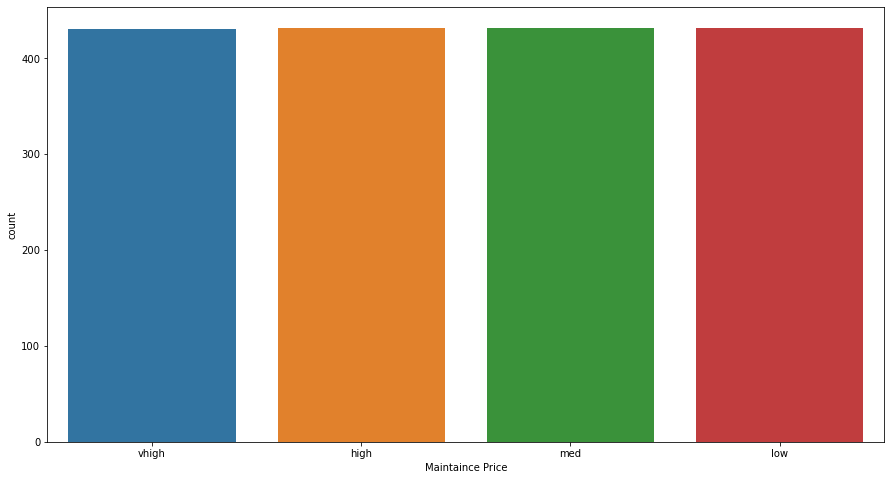

In [16]:
print(df['Maintaince Price'].unique())
plt.figure(figsize=[15,8])
sns.countplot(df['Maintaince Price'])

0           2
1           2
2           2
3           2
4           2
        ...  
1722    5more
1723    5more
1724    5more
1725    5more
1726    5more
Name: Doors Available, Length: 1727, dtype: object


<AxesSubplot:xlabel='Doors Available', ylabel='count'>

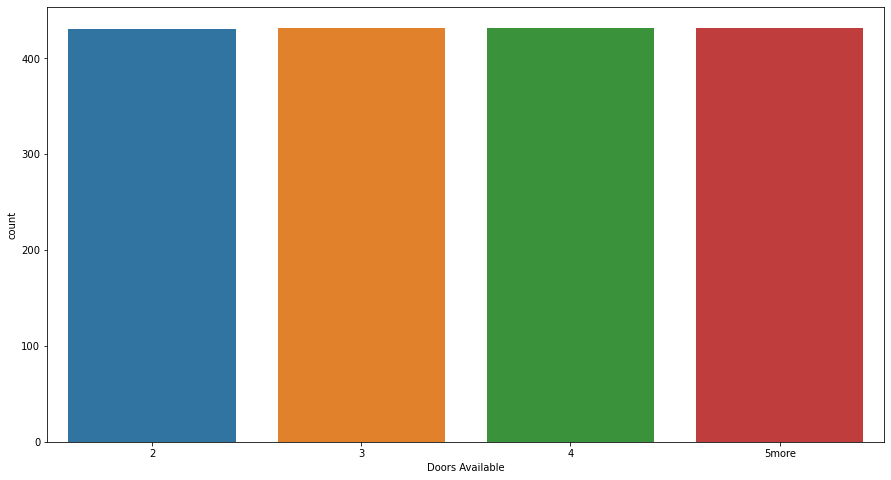

In [17]:
print(df['Doors Available'])
plt.figure(figsize=[15,8])
sns.countplot(df['Doors Available'])

['2' '4' 'more']


<AxesSubplot:xlabel='Number of persons can sit', ylabel='count'>

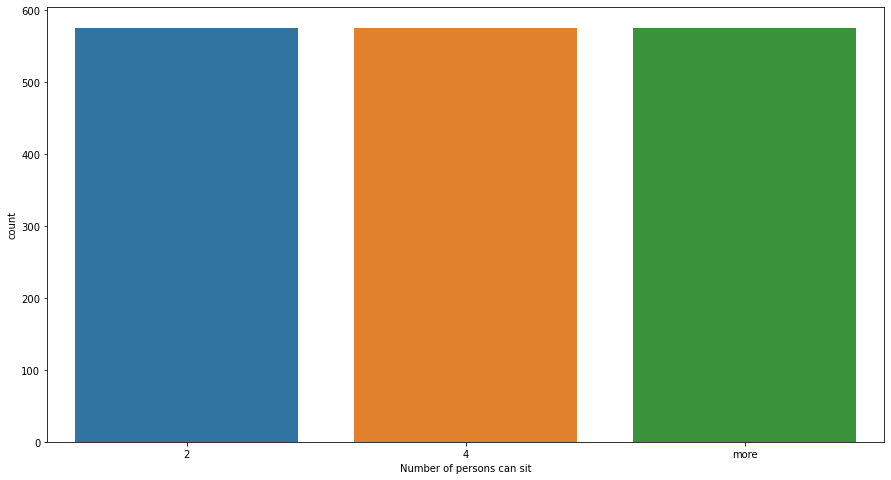

In [18]:
print(df['Number of persons can sit'].unique())
plt.figure(figsize=[15,8])
sns.countplot(df['Number of persons can sit'])

['small' 'med' 'big']


<AxesSubplot:xlabel='Luggage Boot', ylabel='count'>

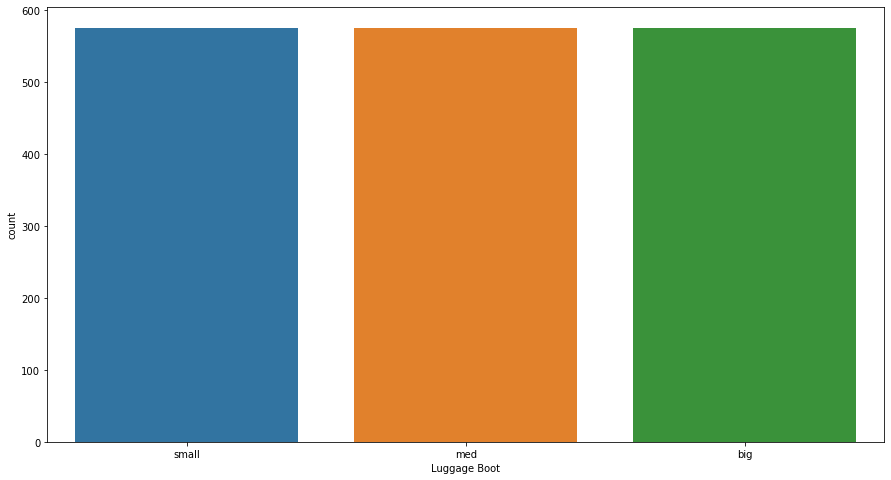

In [19]:
print(df['Luggage Boot'].unique())
plt.figure(figsize=[15,8])
sns.countplot(df['Luggage Boot'])

['med' 'high' 'low']


<AxesSubplot:xlabel='Safety Level', ylabel='count'>

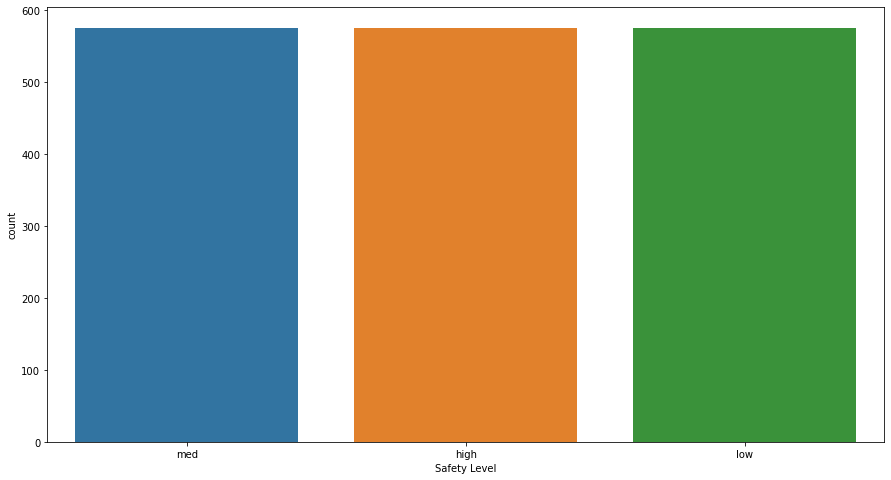

In [20]:
print(df['Safety Level'].unique())
plt.figure(figsize=[15,8])
sns.countplot(df['Safety Level'])

['unacc' 'acc' 'vgood' 'good']


<AxesSubplot:xlabel='Car Acceptiblity', ylabel='count'>

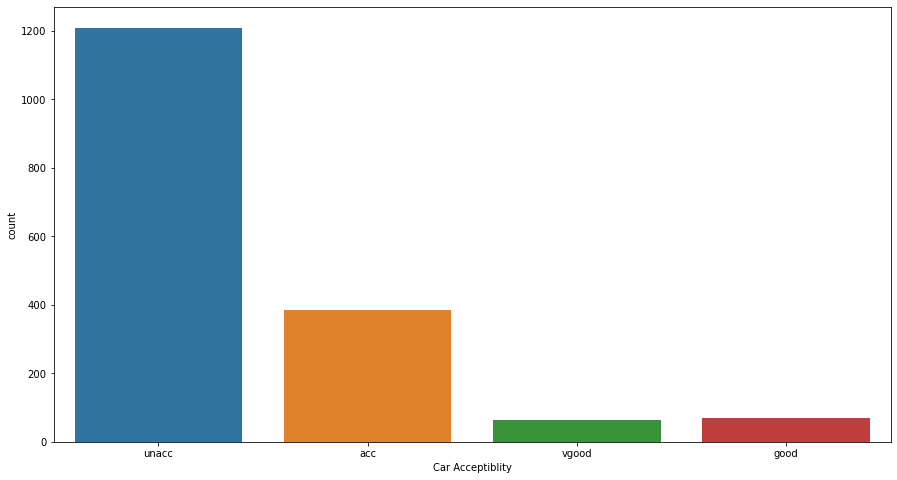

In [21]:
print(df['Car Acceptiblity'].unique())
plt.figure(figsize=[15,8])
sns.countplot(df['Car Acceptiblity'])

Observations: 
    
    1. If we consider the feature variables then all the data is balanced. 
    2. However the target variable - Car Acceptiblity is unbalanced, we will balance it further in the process. 

In [22]:
df.describe().T

,count,unique,top,freq
Buying Price,1727,4,high,432
Maintaince Price,1727,4,high,432
Doors Available,1727,4,3,432
Number of persons can sit,1727,3,4,576
Luggage Boot,1727,3,med,576
Safety Level,1727,3,med,576
Car Acceptiblity,1727,4,unacc,1209


Observation: 
    
    1. All the variables hold equal number of rows in a balanced manner. 
    2. The frequency of each varible is different. Buying and maintaing price do have the same frequency. 

# Encoding the variable to understand the relationship they hold with the target variable - 

In [23]:
le = LabelEncoder()
df['Buying Price'] = le.fit_transform(df['Buying Price'])
df['Maintaince Price'] = le.fit_transform(df['Maintaince Price'])
df['Doors Available'] = le.fit_transform(df['Doors Available'])
df['Number of persons can sit'] = le.fit_transform(df['Number of persons can sit'])
df['Luggage Boot'] = le.fit_transform(df['Luggage Boot'])
df['Safety Level'] = le.fit_transform(df['Safety Level'])
df['Car Acceptiblity'] = le.fit_transform(df['Car Acceptiblity'])

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buying Price,1727.0,1.499131,1.118098,0.0,0.5,1.0,2.0,3.0
Maintaince Price,1727.0,1.499131,1.118098,0.0,0.5,1.0,2.0,3.0
Doors Available,1727.0,1.500869,1.118098,0.0,1.0,2.0,2.5,3.0
Number of persons can sit,1727.0,1.000579,0.816615,0.0,0.0,1.0,2.0,2.0
Luggage Boot,1727.0,0.999421,0.816615,0.0,0.0,1.0,2.0,2.0
Safety Level,1727.0,1.000000,0.816970,0.0,0.0,1.0,2.0,2.0
Car Acceptiblity,1727.0,1.552982,0.876136,0.0,1.0,2.0,2.0,3.0


In [25]:
df.corr()

,Buying Price,Maintaince Price,Doors Available,Number of persons can sit,Luggage Boot,Safety Level,Car Acceptiblity
Buying Price,1.000000e+00,-1.043357e-03,1.043357e-03,9.523677e-04,-9.523677e-04,-3.200145e-16,0.051058
Maintaince Price,-1.043357e-03,1.000000e+00,1.043357e-03,9.523677e-04,-9.523677e-04,-1.012963e-16,0.039821
Doors Available,1.043357e-03,1.043357e-03,1.000000e+00,-9.523677e-04,9.523677e-04,6.731959e-17,-0.030950
Number of persons can sit,9.523677e-04,9.523677e-04,-9.523677e-04,1.000000e+00,8.693132e-04,2.362177e-17,-0.299259
Luggage Boot,-9.523677e-04,-9.523677e-04,9.523677e-04,8.693132e-04,1.000000e+00,-7.231156e-18,0.032839
Safety Level,-3.200145e-16,-1.012963e-16,6.731959e-17,2.362177e-17,-7.231156e-18,1.000000e+00,-0.021045
Car Acceptiblity,5.105835e-02,3.982107e-02,-3.094953e-02,-2.992590e-01,3.283926e-02,-2.104530e-02,1.000000


<AxesSubplot:>

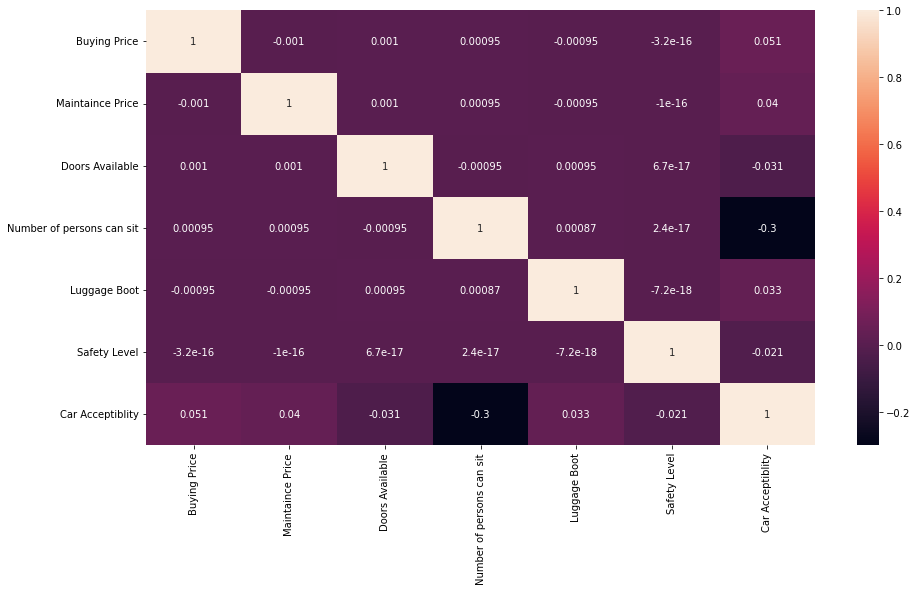

In [26]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(),annot=True)

Observation : 
    
    Each feature variable holds somewhere light correlation with the target variable and among themselves as well. There is no particular variable that has high significance on the target variable.

<AxesSubplot:xlabel='Buying Price', ylabel='Doors Available'>

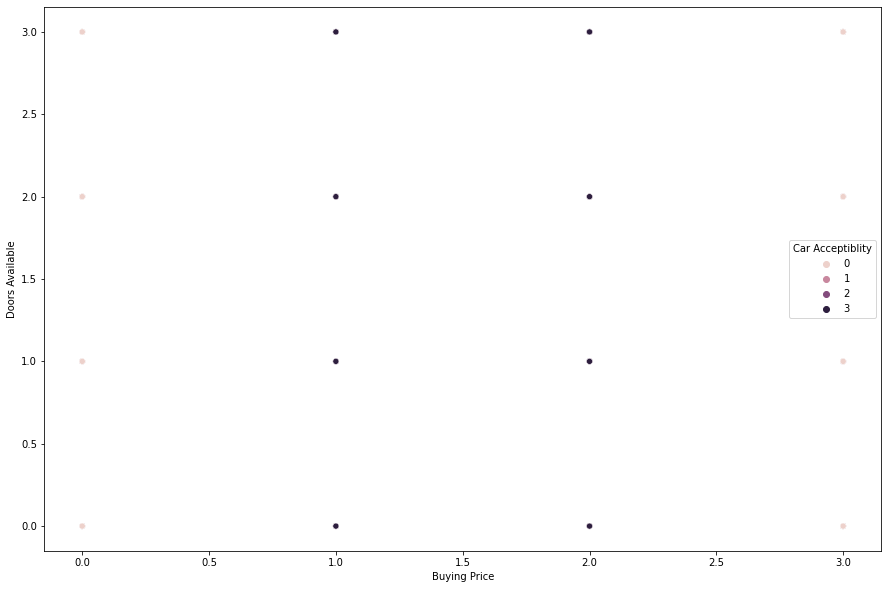

In [27]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Buying Price',y='Doors Available',hue='Car Acceptiblity', data=df)

<AxesSubplot:xlabel='Maintaince Price', ylabel='Doors Available'>

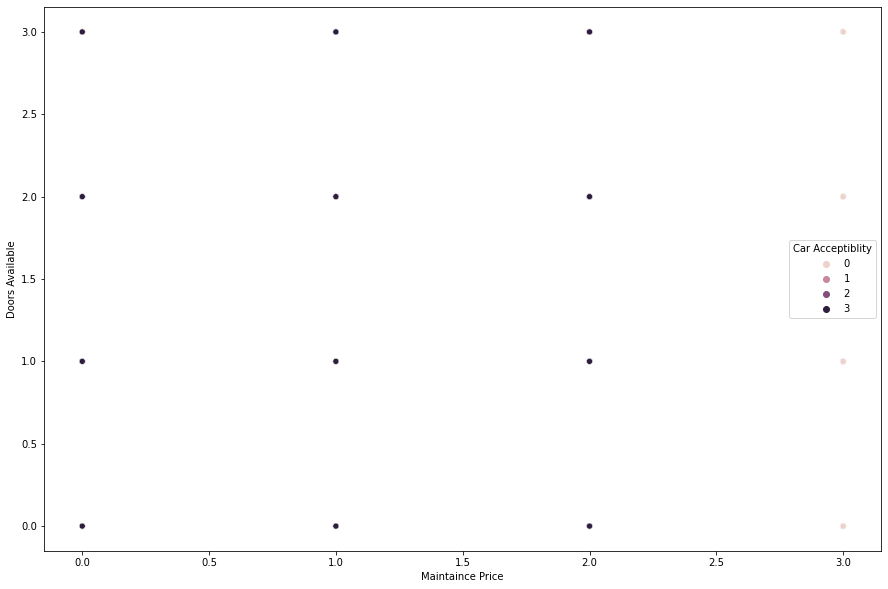

In [28]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Maintaince Price',y='Doors Available',hue='Car Acceptiblity', data=df)

<AxesSubplot:xlabel='Buying Price', ylabel='Number of persons can sit'>

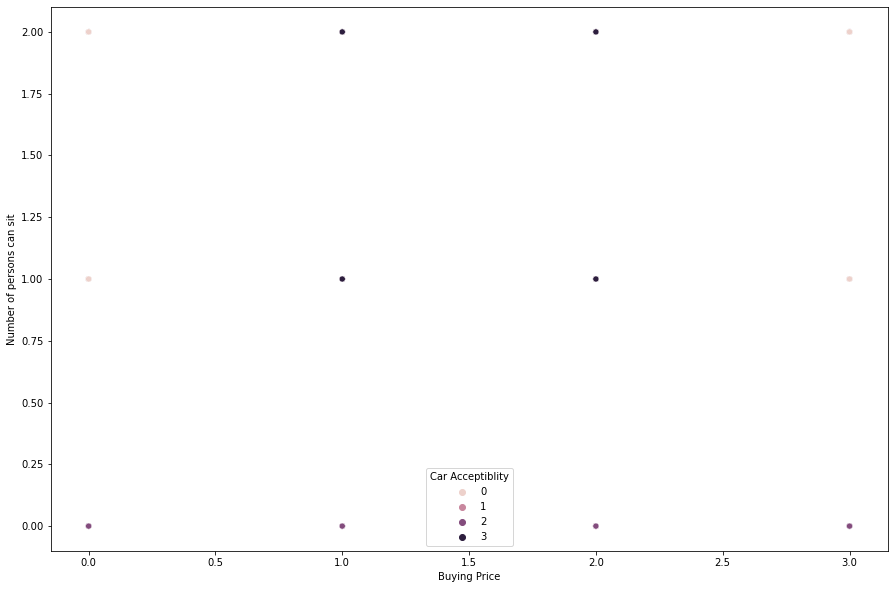

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Buying Price',y='Number of persons can sit',hue='Car Acceptiblity', data=df)

Variables are not following the linear distribution. It indicates that there might be presence of outliers in the dataset or some skewness is available. Let's check further to understand more about this.

In [30]:
df.skew()

Buying Price                 0.000933
Maintaince Price             0.000933
Doors Available             -0.000933
Number of persons can sit   -0.001065
Luggage Boot                 0.001065
Safety Level                 0.000000
Car Acceptiblity            -0.987511
dtype: float64

<AxesSubplot:ylabel='Density'>

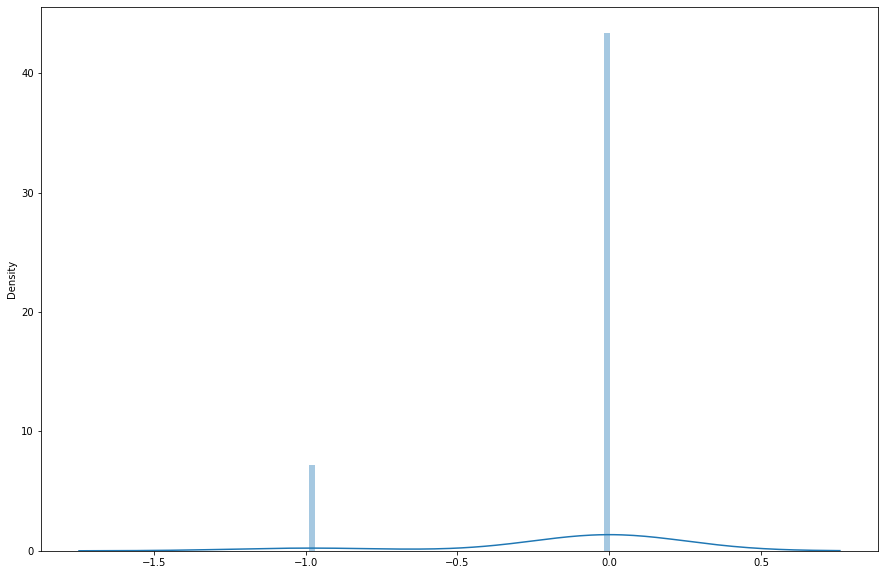

In [31]:
plt.figure(figsize=(15,10))
sns.distplot(df.skew())

There is no skewness in that data distribution keeping the threshold -3 to +3. 

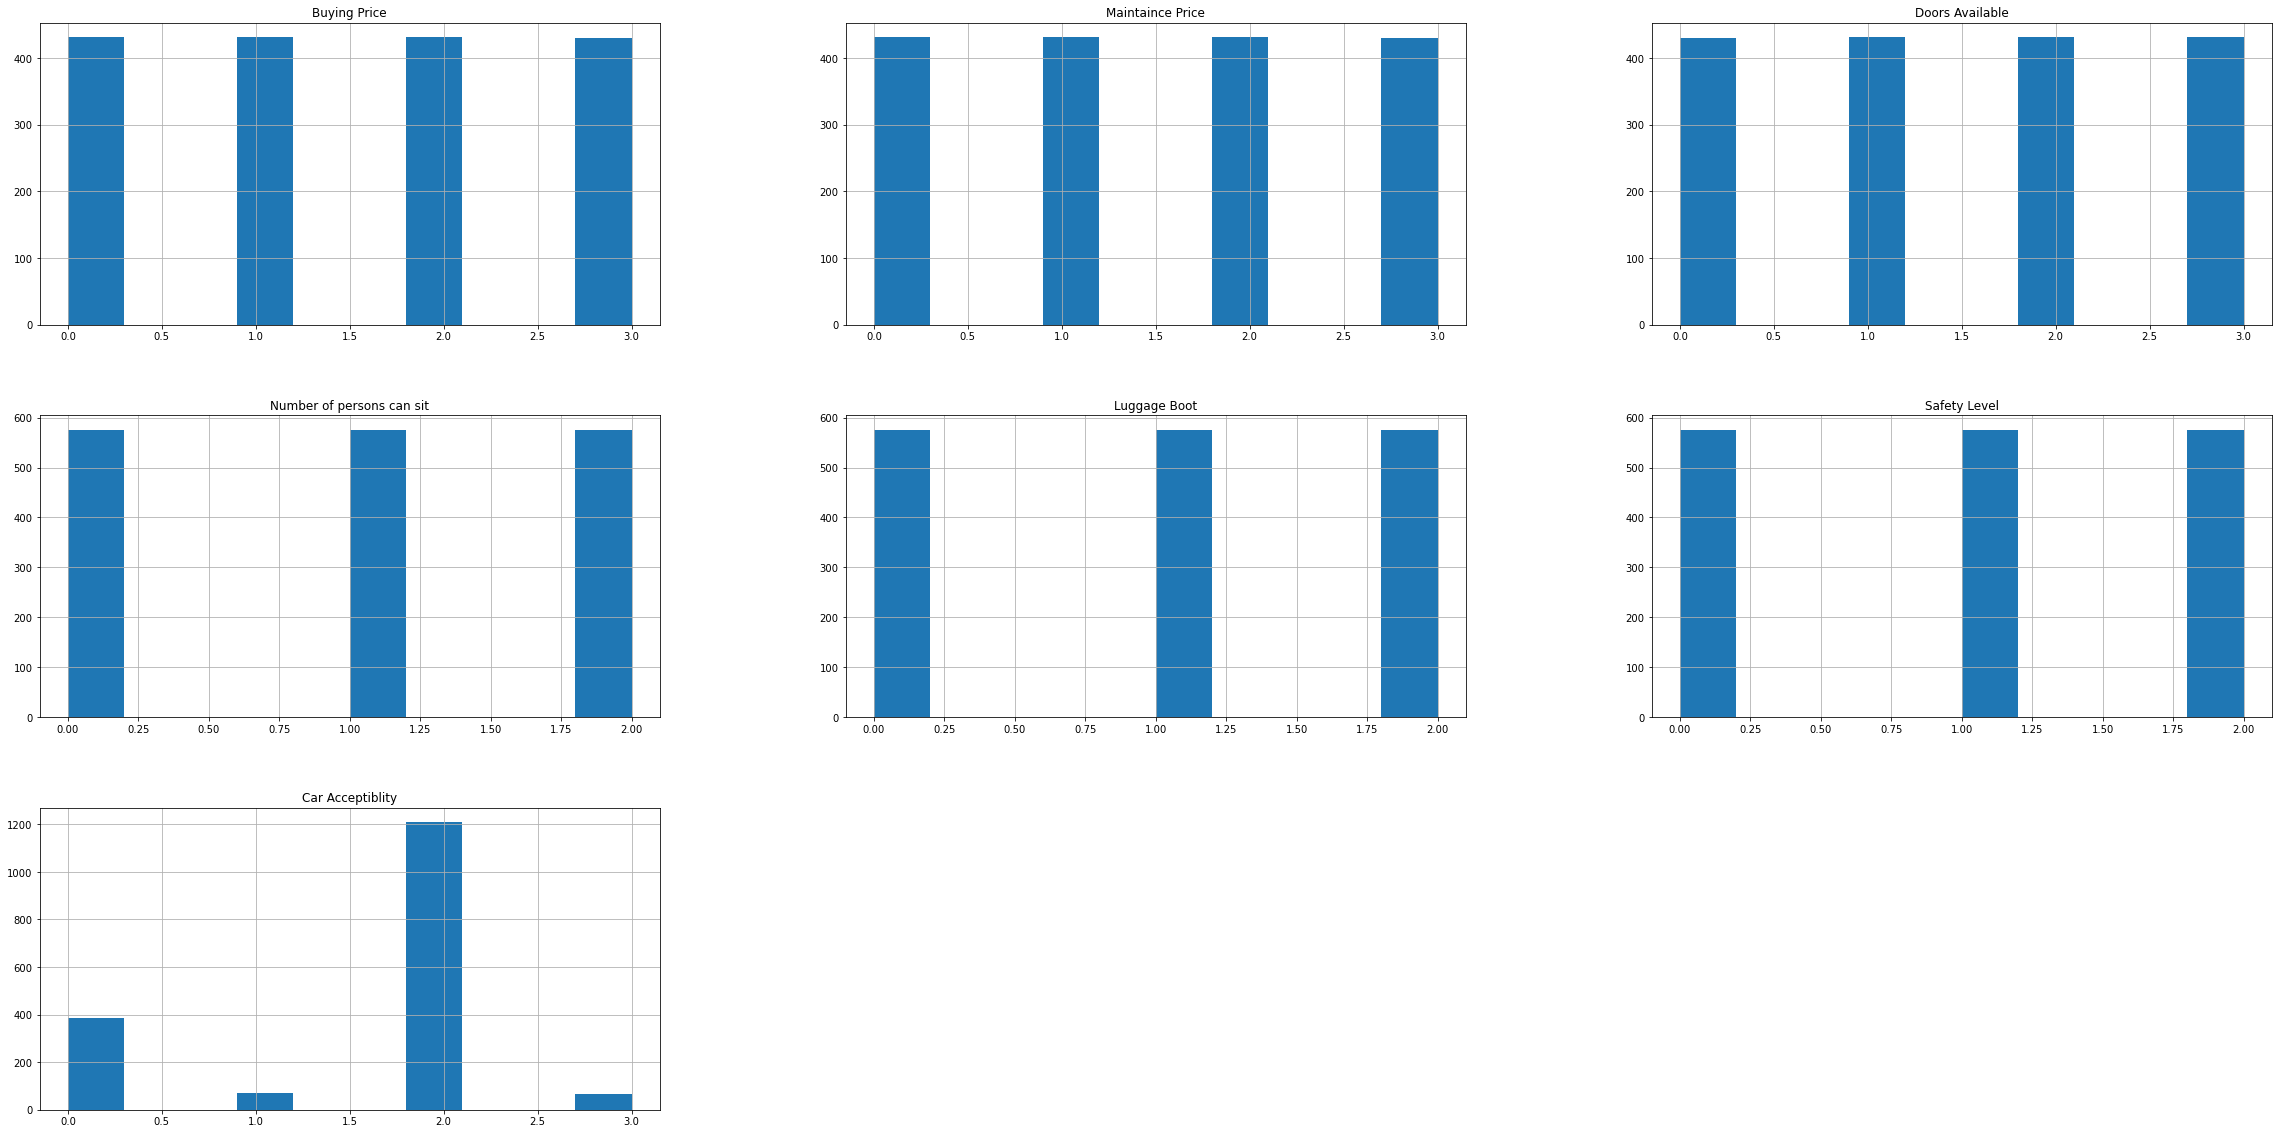

In [32]:
df.hist(figsize=(40,20))
plt.show()

Data is normally distributed, it is clearly indicated by the boxplot we got for each respetive variable.

In [33]:
#Chekcing the presence of outliers in the data.
z = np.abs(zscore(df))
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


There are no outliers present in the dataset. Dataset is good to go for the training.

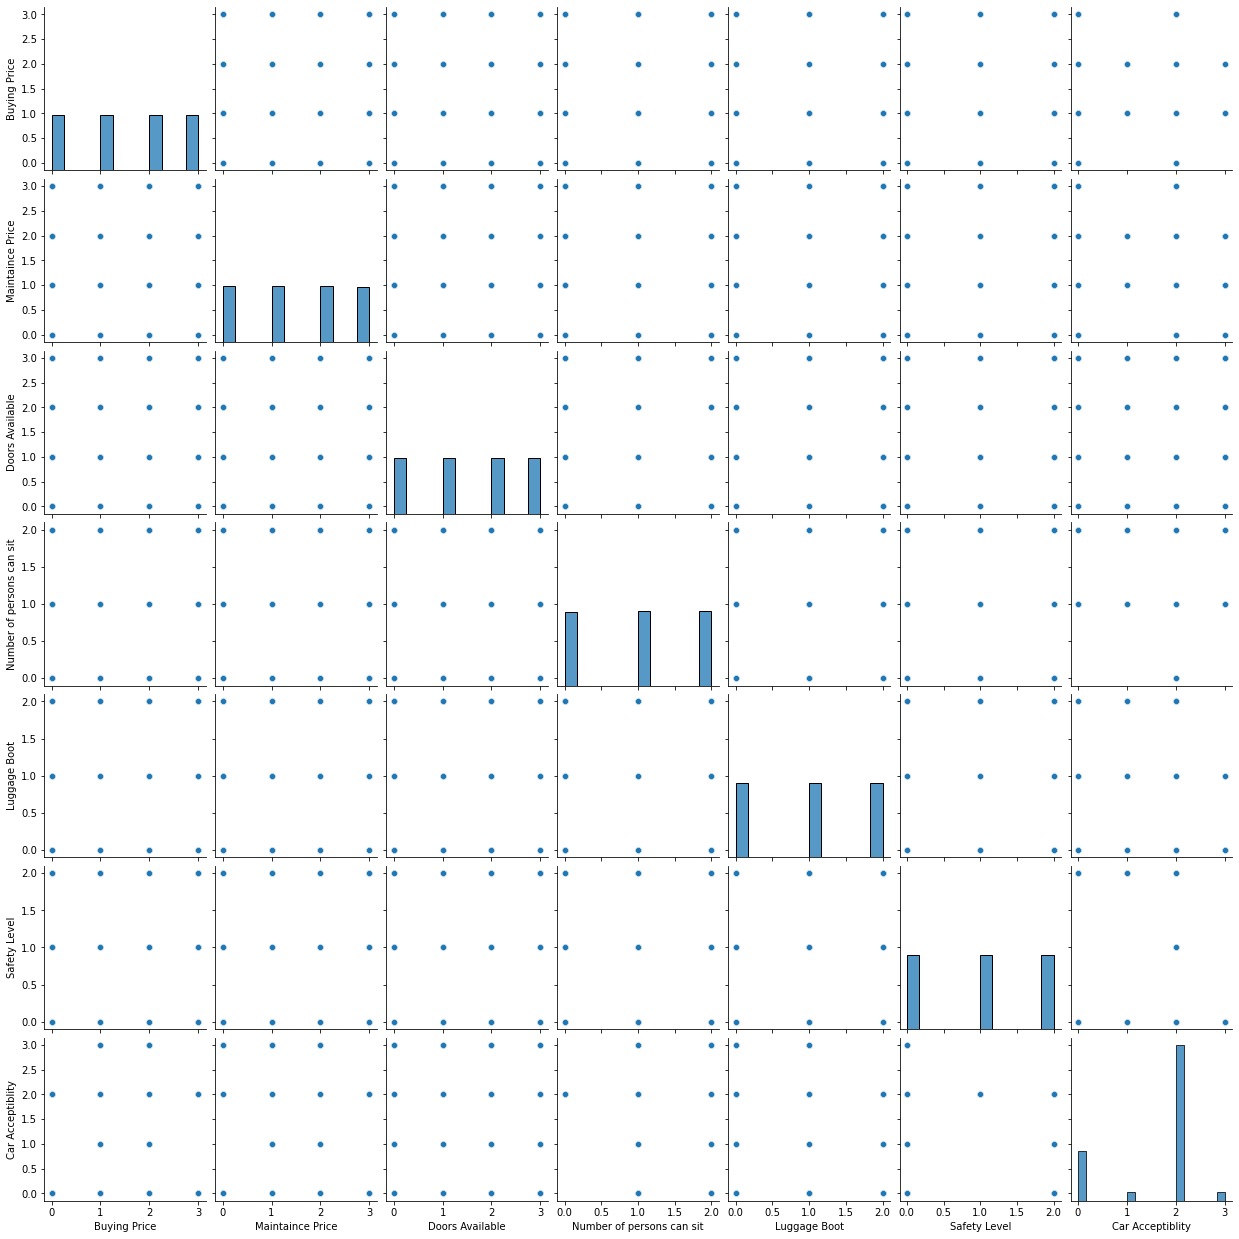

In [34]:
sns.pairplot(df)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Buying Price               1727 non-null   int32
 1   Maintaince Price           1727 non-null   int32
 2   Doors Available            1727 non-null   int32
 3   Number of persons can sit  1727 non-null   int32
 4   Luggage Boot               1727 non-null   int32
 5   Safety Level               1727 non-null   int32
 6   Car Acceptiblity           1727 non-null   int32
dtypes: int32(7)
memory usage: 47.3 KB


# Splitting the dataset now into training and testing phase on the basis of 50% distribution. 

In [36]:
x = df.drop('Car Acceptiblity',axis=1)
y = df['Car Acceptiblity']

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 50, test_size=.50)

In [38]:
x_train.shape

(863, 6)

In [39]:
x_test.shape

(864, 6)

In [40]:
y_train.shape

(863,)

In [41]:
y_test.shape

(864,)

# Putting the Decision Tree Classifier now - 

In [42]:
DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
DT.score(x_train,y_train)

1.0

In [44]:
dtpred = DT.predict(x_test)

In [45]:
dtpred

array([2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 0, 0, 0, 0, 0, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 3, 2, 1, 2, 0, 2, 0, 2, 2, 2, 3, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,

In [46]:
DT.score(x_test,y_test)

0.9618055555555556

When we predicted the variable, we got the predicted values 96% similar to the original valaues - which is a good score. Let's see more in depth what does the accuracy score says about the same.

In [47]:
print("The accuracy score of the models is: ", accuracy_score(y_test,dtpred))

The accuracy score of the models is:  0.9618055555555556


In [48]:
print("The classification report of the model says the following: ") 
print(classification_report(y_test,dtpred))

The classification report of the model says the following: 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       185
           1       0.77      0.71      0.74        38
           2       0.99      0.99      0.99       606
           3       1.00      0.91      0.96        35

    accuracy                           0.96       864
   macro avg       0.92      0.89      0.90       864
weighted avg       0.96      0.96      0.96       864



In [49]:
print("Confusion matrix is as follows: ")
print(confusion_matrix(y_test,dtpred))

Confusion matrix is as follows: 
[[172   6   7   0]
 [ 11  27   0   0]
 [  6   0 600   0]
 [  1   2   0  32]]


The accuracy score of the decision tree classifier model is 96%. 

In [50]:
## Performing the cross validation. 
print('Accuracy_Score of ',DT, 'is', accuracy_score(y_test,DT.predict(x_test))*100)
print("cross Validation accuracy score of ",DT ," is ",cross_val_score(DT,x,y,cv=5, scoring='accuracy').mean()*100)
print('*'*50)

Accuracy_Score of  DecisionTreeClassifier() is 96.18055555555556
cross Validation accuracy score of  DecisionTreeClassifier()  is  79.51227276535143
**************************************************


In [51]:
## Performming the hyperparameeter tuning now. 
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": [3, None],
              "max_features": (1, 9),
              "min_samples_leaf": (1, 9),
              "criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(DT, param_dist, cv = 5)
tree_cv.fit(x, y)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 1, 'max_features': 9, 'max_depth': None, 'criterion': 'entropy'}
Best score is 0.8113211024545531


In [52]:
dtpredict=tree_cv.best_estimator_.predict(x_test)
print(classification_report(y_test,dtpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00       606
           3       1.00      1.00      1.00        35

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864



# Interpretation
On applying the hyperparameter tuning and cross validation score with the Decision Tree Classifier - we got the best score as of 81% and accuracy score 100%. This actaully indicated that this model is siginificantly a great fit for the data set analysis and for making the predictions for the car acceptiblity status. All the variables on an aggregate basis, predicted the target variable "Car Accpetiblity". On predicting we got 81% significant values correct as it is originally given in the dataset. 